In [2]:
#!pip install lux
#import lux
#!pip install pandas
#!pip install seaborn
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
#!pip install openpyxl

In [4]:
hs = pd.read_excel('HS Usage Analytics.xlsx')
hs

,Organization,Username,date,Actions,Total_Actions,Account
0,suburban18,suburban18sleuth,2021-07,APIEPReportFirm,8,Unlimited
1,suburban18,suburban18sleuth,2021-07,APIEPReportPerson,5,Unlimited
2,suburban18,suburban18sleuth,2021-07,InterconnectionSearch,35,Unlimited
3,suburban18,suburban18sleuth,2021-07,RadialSearch,20,Unlimited
4,suburban18,suburban18sleuth,2021-07,RedListPDFReport,1,Unlimited
...,...,...,...,...,...,...
1260,Wallex Technologies Pte Ltd,WallexKYC,2021-08,API EntityProfileReport - Firm,35,PPU
1261,Wallex Technologies Pte Ltd,WallexKYC,2021-09,API EntityProfileReport - Firm,41,PPU
1262,Xfers Pte Ltd,Tianyao,2021-07,API EntityProfileReport - Firm,3,PPU
1263,Xfers Pte Ltd,Tianyao,2021-08,API EntityProfileReport - Firm,1,PPU


In [6]:
hs[hs['Username']=='Antfin']

,Organization,Username,date,Actions,Total_Actions,Account
1194,Alipay Merchant Services Pte. Ltd.,Antfin,2021-07,API EntityProfileReport - Firm,779,PPU
1195,Alipay Merchant Services Pte. Ltd.,Antfin,2021-07,API EntityProfileReport - Person,8,PPU
1196,Alipay Merchant Services Pte. Ltd.,Antfin,2021-08,API EntityProfileReport - Firm,4228,PPU
1197,Alipay Merchant Services Pte. Ltd.,Antfin,2021-08,API EntityProfileReport - Person,54,PPU
1198,Alipay Merchant Services Pte. Ltd.,Antfin,2021-09,API EntityProfileReport - Firm,2226,PPU
1199,Alipay Merchant Services Pte. Ltd.,Antfin,2021-09,API EntityProfileReport - Person,30,PPU


In [41]:
hs_unlimited = hs[hs['Account']=='Unlimited']
hs_prepaid = hs[hs['Account']=='Prepaid']
hs_ppu = hs[hs['Account']=='PPU']

In [42]:
hs_unlimited_analytics = pd.crosstab(hs_unlimited.Username,hs_unlimited.Actions,values=hs_unlimited.Total_Actions,aggfunc='sum',
                               margins=True,margins_name='Total Actions')
hs_unlimited_analytics

Actions,APIEPReportFirm,APIEPReportPerson,ExportMapViewInformation,FinancialProfileReport,InterconnectionSearch,InvesteeCompanies,LegalBeneficialOwnership,ProcurementCheck,RadialSearch,RedListPDFReport,RegistryProfileReportFirm,RegistryProfileReportPerson,Total Actions
Username,,,,,,,,,,,,,
ACRA_ED,NaN,NaN,NaN,NaN,6.0,NaN,NaN,NaN,9.0,1.0,NaN,NaN,16
AGUser01,29.0,63.0,NaN,NaN,5.0,NaN,NaN,NaN,81.0,6.0,NaN,NaN,184
Axcelasia,74.0,8.0,NaN,NaN,4.0,1.0,2.0,NaN,63.0,2.0,NaN,NaN,154
CAD_EG,205.0,82.0,NaN,NaN,88.0,7.0,5.0,NaN,369.0,1.0,NaN,NaN,757
CCIDRMP,2012.0,893.0,4.0,NaN,50.0,3.0,NaN,NaN,782.0,13.0,NaN,NaN,3757
...,...,...,...,...,...,...,...,...,...,...,...,...,...
zeka6,145.0,163.0,1.0,NaN,27.0,1.0,1.0,NaN,244.0,5.0,NaN,NaN,587
zeka7,331.0,248.0,2.0,NaN,67.0,9.0,18.0,NaN,704.0,7.0,NaN,NaN,1386
zeka8,120.0,104.0,9.0,NaN,8.0,NaN,NaN,NaN,775.0,NaN,NaN,NaN,1016


In [43]:
hs_unlimited_analytics = hs_unlimited[['Organization','Username']].merge(hs_unlimited_analytics,on='Username',how='left')
hs_unlimited_analytics = hs_unlimited_analytics.drop_duplicates()
hs_unlimited_analytics

,Organization,Username,APIEPReportFirm,APIEPReportPerson,ExportMapViewInformation,FinancialProfileReport,InterconnectionSearch,InvesteeCompanies,LegalBeneficialOwnership,ProcurementCheck,RadialSearch,RedListPDFReport,RegistryProfileReportFirm,RegistryProfileReportPerson,Total Actions
0,suburban18,suburban18sleuth,24.0,10.0,NaN,NaN,67.0,NaN,NaN,NaN,30.0,1.0,NaN,NaN,132
13,Accounting And Corporate Regulatory Authority,ACRA_ED,NaN,NaN,NaN,NaN,6.0,NaN,NaN,NaN,9.0,1.0,NaN,NaN,16
18,ACE Holding Berhad,AGUser01,29.0,63.0,NaN,NaN,5.0,NaN,NaN,NaN,81.0,6.0,NaN,NaN,184
31,Axcelasia Columbus Sdn Bhd,Axcelasia,74.0,8.0,NaN,NaN,4.0,1.0,2.0,NaN,63.0,2.0,NaN,NaN,154
44,Bank Negara Malaysia,mujahidmn,273.0,119.0,NaN,NaN,36.0,1.0,3.0,NaN,140.0,4.0,NaN,NaN,576
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
835,SKS Credit Sdn Bhd,skscredit,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
836,SPF Commercial Affairs Department,CAD_EG,205.0,82.0,NaN,NaN,88.0,7.0,5.0,NaN,369.0,1.0,NaN,NaN,757
853,Suruhanjaya Syarikat Malaysia (SSM),SiasatanSSM,2.0,5.0,2.0,NaN,9.0,NaN,1.0,NaN,25.0,3.0,NaN,NaN,47
865,VentureCap Insights Pte Ltd,jgedwardsMY,13.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,988.0,NaN,NaN,NaN,1002


In [44]:
hs_prepaid_analytics = pd.crosstab(hs_prepaid.Username,hs_prepaid.Actions,values=hs_prepaid.Total_Actions,aggfunc='sum',
                               margins=True,margins_name='Total Actions')
hs_prepaid_analytics

Actions,API EntityProfileReport - Firm,API EntityProfileReport - Person,EntityProfileReport - Firm,EntityProfileReportPRO - Firm,Expand,Financial Profile Report,InterconnectionSearch,Investee Companies,Legal Beneficial Ownership,ProcurementCheck,RadialSearch,RedListPDFReport,Total Actions
Username,,,,,,,,,,,,,
AGDAFS,NaN,NaN,NaN,NaN,NaN,NaN,30.0,NaN,NaN,NaN,1.0,NaN,31
AGUser01,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,6
AHAM,5.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.0,2.0,24
ALPS-WMH,3.0,NaN,NaN,NaN,NaN,2.0,2.0,NaN,NaN,NaN,2.0,NaN,9
Azlan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.0,NaN,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...
tranpal,13.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,4.0,NaN,18
yeecheewei,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.0,NaN,19
zeka2,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,2


In [45]:
hs_prepaid_analytics = hs_prepaid[['Organization','Username']].merge(hs_prepaid_analytics,on='Username',how='left')
hs_prepaid_analytics = hs_prepaid_analytics.drop_duplicates()
hs_prepaid_analytics

,Organization,Username,API EntityProfileReport - Firm,API EntityProfileReport - Person,EntityProfileReport - Firm,EntityProfileReportPRO - Firm,Expand,Financial Profile Report,InterconnectionSearch,Investee Companies,Legal Beneficial Ownership,ProcurementCheck,RadialSearch,RedListPDFReport,Total Actions
0,Accountant-General's Department,AGDAFS,NaN,NaN,NaN,NaN,NaN,NaN,30.0,NaN,NaN,NaN,1.0,NaN,31
4,ACE Holding Berhad,AGUser01,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,6
8,Affin Hwang Asset Management Berhad,AHAM,5.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.0,2.0,24
15,Allianz Life Insurance Malaysia Berhad,compliance_allianz,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,NaN,9
18,ALPS Pte. Ltd.,ALPS-WMH,3.0,NaN,NaN,NaN,NaN,2.0,2.0,NaN,NaN,NaN,2.0,NaN,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300,Tokio Marine Life Insurance Malaysia Bhd.,ConneX_Q132300,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,2.0,NaN,4
302,Tremco CPG Malaysia Sdn Bhd,ConneX_EC624600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1
303,TRS Forensics Pte. Ltd.,tansweewan,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
305,VentureCap Insights Pte Ltd,jgedwardsMY,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


In [46]:
hs_ppu_analytics = pd.crosstab(hs_ppu.Username,hs_ppu.Actions,values=hs_ppu.Total_Actions,aggfunc='sum',
                               margins=True,margins_name='Total Actions')
hs_ppu_analytics

Actions,API EntityProfileReport - Firm,API EntityProfileReport - Person,InterconnectionSearch,Investee Companies,Legal Beneficial Ownership,RadialSearch,RedListPDFReport,Total Actions
Username,,,,,,,,
Antfin,7233.0,92.0,NaN,NaN,NaN,NaN,NaN,7325
Benpower,NaN,NaN,1.0,NaN,NaN,5.0,NaN,6
CCCS_User1,10.0,1.0,21.0,NaN,NaN,6.0,NaN,38
CCCS_User2,NaN,NaN,13.0,NaN,NaN,NaN,NaN,13
Exellar1,NaN,NaN,NaN,NaN,NaN,NaN,234.0,234
FWDRC,3.0,NaN,NaN,NaN,NaN,NaN,NaN,3
IHSM_KYCOps,12.0,NaN,NaN,NaN,NaN,NaN,NaN,12
Jacolu177,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1
Justin,2.0,NaN,NaN,NaN,NaN,NaN,NaN,2


In [47]:
hs_ppu_analytics = hs_ppu[['Organization','Username']].merge(hs_ppu_analytics,on='Username',how='left')
hs_ppu_analytics = hs_ppu_analytics.drop_duplicates()
hs_ppu_analytics

,Organization,Username,API EntityProfileReport - Firm,API EntityProfileReport - Person,InterconnectionSearch,Investee Companies,Legal Beneficial Ownership,RadialSearch,RedListPDFReport,Total Actions
0,Alipay Merchant Services Pte. Ltd.,Antfin,7233.0,92.0,NaN,NaN,NaN,NaN,NaN,7325
6,Caravel Capital Pte Ltd,johnlimcaravel,NaN,NaN,NaN,NaN,NaN,7.0,NaN,7
8,Competition & Consumer Commission of Singapore,CCCS_User1,10.0,1.0,21.0,NaN,NaN,6.0,NaN,38
17,Competition & Consumer Commission of Singapore,CCCS_User2,NaN,NaN,13.0,NaN,NaN,NaN,NaN,13
19,Control Risks Group (s) Pte Ltd,sgcontrolrisks,NaN,NaN,7.0,2.0,NaN,NaN,5.0,14
23,EXELLAR Consulting Pte. Ltd.,Exellar1,NaN,NaN,NaN,NaN,NaN,NaN,234.0,234
26,FUTUREADY ASIA SINGAPORE,futuready,NaN,NaN,1.0,NaN,NaN,6.0,NaN,7
30,FWD Singapore,FWDRC,3.0,NaN,NaN,NaN,NaN,NaN,NaN,3
31,Markit Group Limited,IHSM_KYCOps,12.0,NaN,NaN,NaN,NaN,NaN,NaN,12
33,MOH Holdings Pte Ltd,Mohhgia1,NaN,NaN,2.0,NaN,NaN,NaN,NaN,2


In [10]:
# plt.figure(figsize=(20,10))

# sns.heatmap(hs_unlimited_analytics,cmap='Blues',annot=True)
# plt.show()

In [36]:
hs_grouped = hs.groupby(['date','Account']).agg({'Total_Actions':'sum'})
hs_grouped.reset_index(inplace=True)

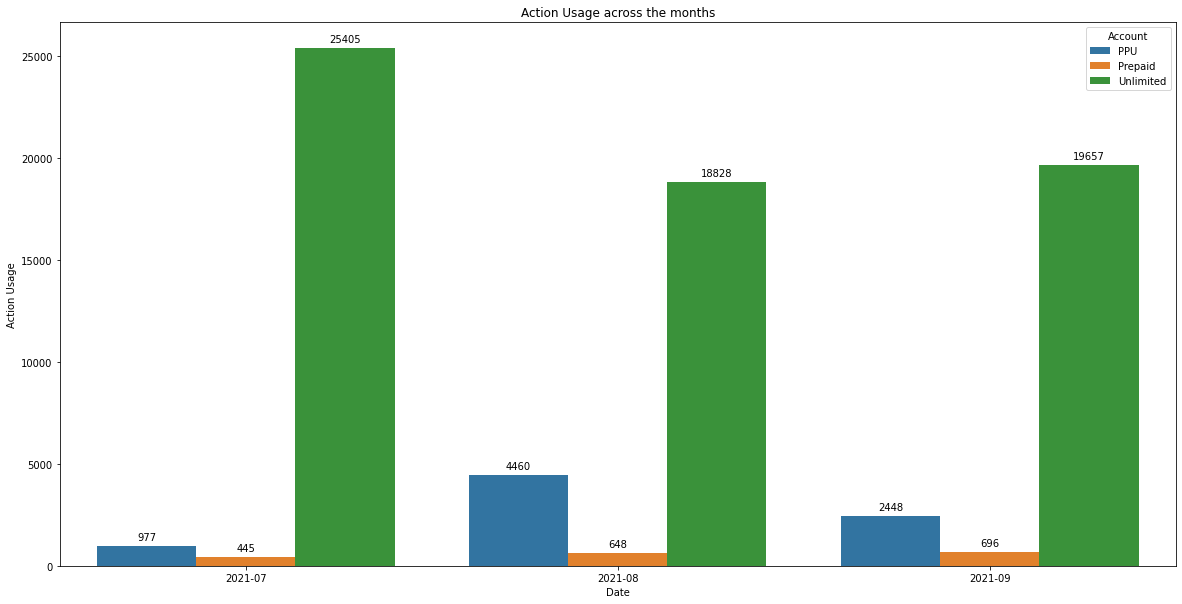

In [37]:
plt.figure(figsize=(20,10))

splot = sns.barplot(x='date',y='Total_Actions',hue='Account',data=hs_grouped)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

plt.xlabel('Date')
plt.ylabel('Action Usage')
plt.title('Action Usage across the months')
plt.show()

In [51]:
hs_unlimited_analytics.to_excel('hs_unlimited_analytics.xlsx')

In [52]:
hs_prepaid_analytics.to_excel('hs_prepaid_analytics.xlsx')

In [53]:
hs_ppu_analytics.to_excel('hs_ppu_analytics.xlsx')

In [16]:
hs_unlimited_grouped = hs_unlimited.groupby(['Actions']).agg({'Total_Actions':'sum'})
hs_unlimited_grouped.sort_values('Total_Actions',ascending=False)

,Total_Actions
Actions,
RadialSearch,22482
APIEPReportFirm,22409
APIEPReportPerson,6047
InterconnectionSearch,4138
RedListPDFReport,3896
RegistryProfileReportFirm,1851
FinancialProfileReport,1477
LegalBeneficialOwnership,797
InvesteeCompanies,417


In [17]:
hs_prepaid_grouped = hs_prepaid.groupby(['Actions']).agg({'Total_Actions':'sum'})
hs_prepaid_grouped.sort_values('Total_Actions',ascending=False)

,Total_Actions
Actions,
RadialSearch,599
InterconnectionSearch,384
API EntityProfileReport - Firm,344
API EntityProfileReport - Person,176
RedListPDFReport,129
Legal Beneficial Ownership,71
ProcurementCheck,48
EntityProfileReportPRO - Firm,14
Investee Companies,13


In [18]:
hs_ppu_grouped = hs_ppu.groupby(['Actions']).agg({'Total_Actions':'sum'})
hs_ppu_grouped.sort_values('Total_Actions',ascending=False)

,Total_Actions
Actions,
API EntityProfileReport - Firm,7437
RedListPDFReport,240
API EntityProfileReport - Person,95
InterconnectionSearch,54
RadialSearch,54
Legal Beneficial Ownership,3
Investee Companies,2


In [19]:
hs_unlimited_user_grouped = hs_unlimited.groupby(['Organization','Username']).agg({'Total_Actions':'sum'})
hs_unlimited_user_grouped.sort_values('Total_Actions',ascending=False)

,,Total_Actions
Organization,Username,
Personal,jgedwards,11099
Deloitte & Touche LLP,SGDELOITTEAUDIT,5614
OCBC Bank - Singapore,OCBCGCBBC2,4115
Singapore Press Holdings,SPHCorp,4018
Polis Diraja Malaysia,CCIDRMP,3757
...,...,...
Securities and Futures Commission (SFC),bhyfung,2
SKS Credit Sdn Bhd,skscredit,2
BDO Governance Advisory Sdn Bhd,GA-Forensic,1


In [20]:
hs_prepaid_user_grouped = hs_prepaid.groupby(['Organization','Username']).agg({'Total_Actions':'sum'})
hs_prepaid_user_grouped.sort_values('Total_Actions',ascending=False)

,,Total_Actions
Organization,Username,
Polis Diraja Malaysia,CCIDRMP,281
SAC Capital Private Limited,Chaihong,167
Singapore Zoological Gardens,karentan,83
Singapore Exchange,SGXSURV,73
Nanyang Technological University (NTU),NTUIAO,70
...,...,...
Ram Reza & Muhammad,hisham,1
Enterprise Singapore,ESG-IA,1
Gamuda Berhad,MuhamadKhairie,1


In [21]:
hs_ppu_user_grouped = hs_ppu.groupby(['Organization','Username']).agg({'Total_Actions':'sum'})
hs_ppu_user_grouped.sort_values('Total_Actions',ascending=False)

,,Total_Actions
Organization,Username,
Alipay Merchant Services Pte. Ltd.,Antfin,7325
EXELLAR Consulting Pte. Ltd.,Exellar1,234
Wallex Technologies Pte Ltd,WallexKYC,114
Competition & Consumer Commission of Singapore,CCCS_User1,38
precursor group pte. ltd.,corpsec1,28
RSM Risk Advisory Pte Ltd,RSMRAS,26
Control Risks Group (s) Pte Ltd,sgcontrolrisks,14
Competition & Consumer Commission of Singapore,CCCS_User2,13
Markit Group Limited,IHSM_KYCOps,12


In [22]:
hs_firm_person = hs[hs['Actions'].str.contains('Firm','Person')]
hs_firm = hs[hs['Actions'].str.contains('Firm')]
hs_person = hs[hs['Actions'].str.contains('Person')]

hs_firm_grouped = hs_firm.groupby('date').agg({'Total_Actions':'sum'})
hs_person_grouped = hs_person.groupby('date').agg({'Total_Actions':'sum'})
hs_firm_person_grouped = hs_firm_grouped.merge(hs_person_grouped,on='date',how='inner')
hs_firm_person_grouped.reset_index(inplace=True)
hs_firm_person_grouped.rename(columns={'Total_Actions_x':'Firm Report Usage','Total_Actions_y':'Person Report Usage'},inplace=True)
hs_firm_person_grouped['Firm_Person_Ratio'] = hs_firm_person_grouped['Firm Report Usage']/hs_firm_person_grouped['Person Report Usage']
hs_firm_person_grouped

,date,Firm Report Usage,Person Report Usage,Firm_Person_Ratio
0,2021-07,11222,2205,5.089342
1,2021-08,11042,2120,5.208491
2,2021-09,9799,2141,4.576833


In [23]:
hs_firm_person['Firm_Person_Ratio'] = hs_firm.Total_Actions.sum()/hs_person.Total_Actions.sum()
hs_firm_person

C:\Users\HONGEE~1\AppData\Local\Temp/ipykernel_14472/3859817559.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hs_firm_person['Firm_Person_Ratio'] = hs_firm.Total_Actions.sum()/hs_person.Total_Actions.sum()


,Organization,Username,date,Actions,Total_Actions,Account,Firm_Person_Ratio
0,suburban18,suburban18sleuth,2021-07,APIEPReportFirm,8,Unlimited,4.958707
5,suburban18,suburban18sleuth,2021-08,APIEPReportFirm,13,Unlimited,4.958707
9,suburban18,suburban18sleuth,2021-09,APIEPReportFirm,3,Unlimited,4.958707
18,ACE Holding Berhad,AGUser01,2021-07,APIEPReportFirm,1,Unlimited,4.958707
23,ACE Holding Berhad,AGUser01,2021-08,APIEPReportFirm,10,Unlimited,4.958707
...,...,...,...,...,...,...,...
1260,Wallex Technologies Pte Ltd,WallexKYC,2021-08,API EntityProfileReport - Firm,35,PPU,4.958707
1261,Wallex Technologies Pte Ltd,WallexKYC,2021-09,API EntityProfileReport - Firm,41,PPU,4.958707
1262,Xfers Pte Ltd,Tianyao,2021-07,API EntityProfileReport - Firm,3,PPU,4.958707
1263,Xfers Pte Ltd,Tianyao,2021-08,API EntityProfileReport - Firm,1,PPU,4.958707
